In [ ]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Basics").getOrCreate()

In [ ]:
spark

In [ ]:
from pyspark.sql import functions as F

# Import for typecasting columns
from pyspark.sql.types import IntegerType,BooleanType,DateType,FloatType,StringType

from pyspark.sql.types import ArrayType

### Task 01: Read the data
Ensure you read the data so that all columns are read with the right data type. The "right" datatype at this stage are shown in the expected output cell below.

Sample input: This task does not have an input.

Sample output: Dataframe stored in the variable raw_recipes_df.



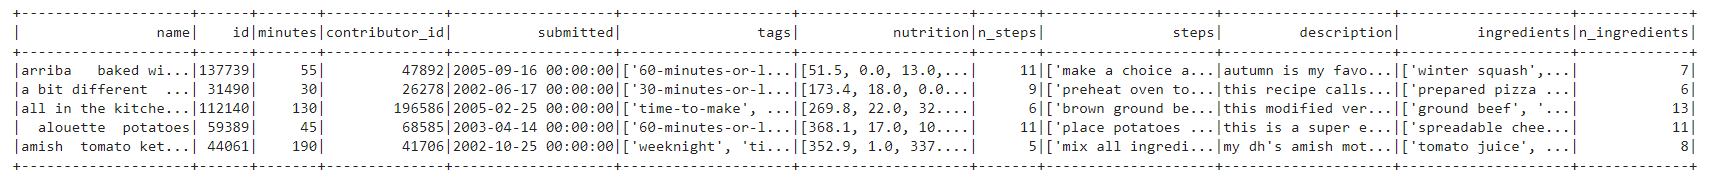

We have included some test cases given below. 

### Solution

In [ ]:
# Task 01 Cell 1 out of 1

raw_recipes_df = spark.read.csv("RAW_recipes_cleaned.csv",inferSchema=True,header=True) 
                   # argument 1, Add an argument to communicate to the compiler that there is a header in the raw data.
                   # argument 2, Add an argument to ask the complier to estimate the data types for all columns. 
raw_recipes_df.show(5)
# Please forward the exact name of data frames and columns as suggested in the code. 
# It will ensure that the assert commands function correctly. 

In [ ]:
raw_recipes_df.printSchema()

Test cases for Task 01

In [ ]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_recipes_df.count() == 231637, "There is a mistake in reading the data."
assert len(raw_recipes_df.columns) == 12, "There is a mistake in reading the data."
assert raw_recipes_df.schema["minutes"].dataType == IntegerType(), "The data types have not been read correctly."
assert raw_recipes_df.schema["tags"].dataType == StringType(), "The data types have not been read correctly."
assert raw_recipes_df.schema["n_ingredients"].dataType == IntegerType(), "The data types have not been read correctly."

In [ ]:
raw_recipes_df.count() == 231637

In [ ]:
len(raw_recipes_df.columns) == 12

In [ ]:
raw_recipes_df.schema["minutes"].dataType == IntegerType()

In [ ]:
raw_recipes_df.schema["tags"].dataType == StringType()

In [ ]:
raw_recipes_df.schema["n_ingredients"].dataType == IntegerType()

If all test cases pass task 01 ends

#### Extract nutrition values

In [ ]:
# List of nutrition columns

nutrition_column_names = ['calories',
                          'total_fat_PDV',
                          'sugar_PDV',
                          'sodium_PDV',
                          'protein_PDV',
                          'saturated_fat_PDV',
                          'carbohydrates_PDV']

### Task 02: Extract individual features from the nutrition column.

As read by the spark compiler, the nutrition column is a string column when it should be an array of float values. Each row in the nutrition column contains seven values. Each value represents nutrition information.
Your task is to separate the array into seven individual columns.

Write a code that takes in the nutrition column from raw_recipes_df dataframe, and extracts individual values into seven different columns named calories, total fat (PDV), sugar (PDV), sodium (PDV), protein (PDV), saturated fat (PDV), and carbohydrates (PDV).

#### Sample input:
The image below shows a subset of columns from the raw_recipes_df dataset. The datatype of the nutrition column is a string.

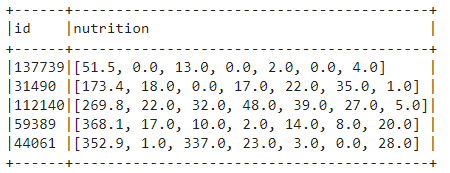

#### Sample Output:
The image below shows a subset of columns from the raw_recipes_df dataset after the extraction of nutrition values is completed. The datatype of the individual nutrition column is has to be float.

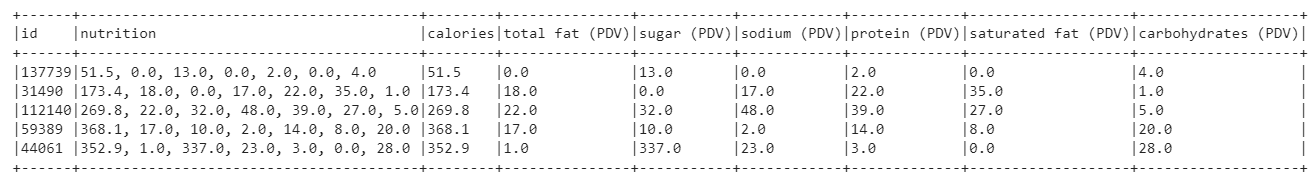

This task is further divided into two sub tasks

### Task 2.1
Use string operations to remove the square brackets from the nutrition column.

Sample input: nutrition column

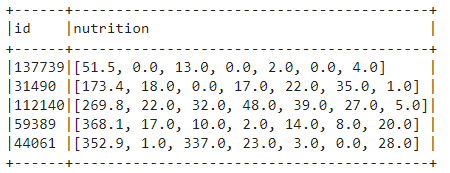

Sample output: Nutrition column without the brackets.

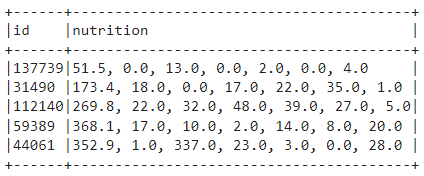

### Task 2.2
Task 2.2 Split the nutrition column into seven individual columns and cast the new columns to float values.

First split the column on using the comma delimiter. Then you can use a for loop to iterate over the column names declared in the variable nutrition_column_names, inside each iteration write a code to extract the value at a specific index of the nutrition array

Sample input: Nutrition column without the brackets.

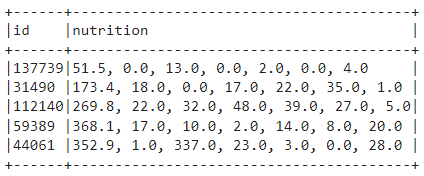

Sample output: Nutrition column split into multiple

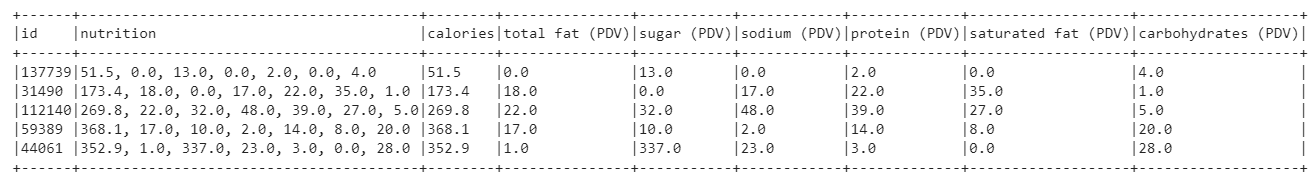

We have included some test cases given below. You can use them to check if you have completed the task correctly.

#### Solution to Task 2
complete the code in the following cell

In [ ]:
# Task 02 Cell 1 out of 2
# 2.1 - string operations to remove square brakets

raw_recipes_df = (raw_recipes_df
                  .withColumn('nutrition',(F.regexp_replace("nutrition","[\[\]]","")) 
                             # add code to remove square brackets
                             # pyspark function to replace string characters
                             ))

In [ ]:
# Task 02 Cell 2 out of 3
# STEP 2.2 - split the neutrition string into seven individial values. 
# Create an object to split the nutrition column
import pyspark
nutrition_cols_split = pyspark.sql.functions.split(raw_recipes_df['nutrition'],',')

# Write a loop to extract individual values from the nutrition column

for col_index, col_name in enumerate(nutrition_column_names):
    # col_index holds the index number of each column, e.g., calories will be 0
    # col_name holds the name of each column 
    
    raw_recipes_df = (raw_recipes_df.withColumn(col_name, nutrition_cols_split.getItem(col_index).cast("float") 
                                        # pyspark function to extract individual values from the nutrition_cols_split object
                                        # You can also cast the extracted value to floats in the same code. 
                                               ))

#### Test cases for task 02

In [ ]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_recipes_df.schema["carbohydrates_PDV"].dataType == FloatType(), "Recheck your typecasting"
assert raw_recipes_df.collect()[123432][14] == 62.0, "The columns have not been split correctly."
assert raw_recipes_df.collect()[10000][12] == 60.400001525878906, "The columns have not been split correctly."

In [ ]:
raw_recipes_df.schema["carbohydrates_PDV"].dataType == FloatType()

In [ ]:
raw_recipes_df.collect()[123432][14] == 62.0

In [ ]:
raw_recipes_df.collect()[10000][12] == 60.400001525878906

If all test cases pass task 02 ends

#### Make nutrition-per-100 calorie columns
By converting the nutrition values from absolute to relative terms, we ensure that portion size is not a factor in the analysis.

Naming convention: Original column name total fat (PDV), column name after column total_fat_per_100_cal

### Task 03: Standardize the nutrition values
The current values for nutrition columns are not on the same scale. Your task is to standardize the nutrition columns using calories as the base of standardization.
Convert the nutrition from absolute values to per 100 calorie values.

We will use the sugar (PDV) column to demonstrate the calculations for standardization.

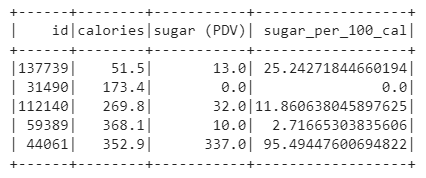

Sample Calculation

Before transformation: sugar (PDV) for recipe id 137739 = 13.0

Calories in the recipe recipe id 137739 = 51.5

Calculation:
sugar_per_100_cal = 13.0 * 100 / 51.5

After transformation sugar_per_100_cal = 25.24

Sample Input:

All nutrition columns except calories

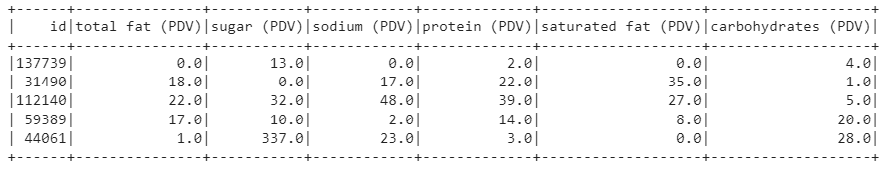

Sample Output:

All nutrition columns standardized to per 100 calories

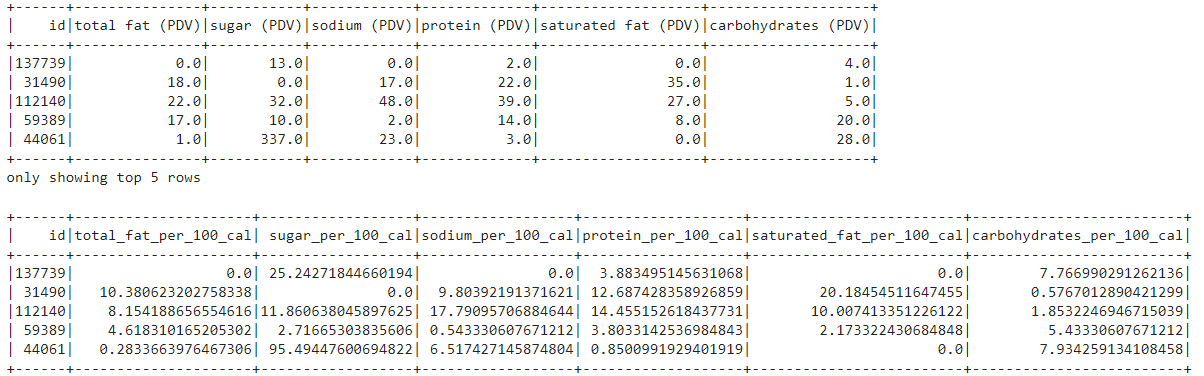

### Solution to Task 3

In [ ]:
# Task 03 Cell 1 out of 1

for nutrition_col in nutrition_column_names:# loop over each of the newly created nutrition columns 
    if nutrition_col != "calories":
        # the calories column should not be a part of the transformation exercise
        # following code will name the new columns 
        nutrition_per_100_cal_col = (nutrition_col
                                 .replace('_PDV','')
                                 +'_per_100_cal')
        raw_recipes_df = raw_recipes_df.withColumn(nutrition_per_100_cal_col,
                                               raw_recipes_df[nutrition_col]*100/raw_recipes_df["calories"]
                                                # pyspark code to recreate the intended transformation 
                                                  )
        
        # You might end up adding nulls to the data because of our intended transformation. 
        # Perform a fill na operation to fill all the nulls with 0s. 
        # You must limit the scope of the fill na to the current column only. 
        
        raw_recipes_df = raw_recipes_df.fillna(value=0,subset=[nutrition_per_100_cal_col]) 
        # pyspark code to fill nulls with 0 in only the current nutrition_per_100_cal_col   

#### Test cases for Task 03

In [ ]:
# total fat check for id 28881
assert raw_recipes_df.filter("id == 28881").select('total_fat_per_100_cal').first()[0] == 0, "total_fat_per_100_cal for recipe 28881 should be 0"

# total fat check for id 112140
assert round(raw_recipes_df.filter("id == 112140").select('total_fat_per_100_cal').first()[0]) == 8, "total_fat_per_100_cal for recipe 112140 should be 8"

# checking for nulls
for c in ['total_fat_per_100_cal','sugar_per_100_cal','sodium_per_100_cal','protein_per_100_cal',
                          'saturated_fat_per_100_cal','carbohydrates_per_100_cal']:
    assert raw_recipes_df.select(F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c)).collect()[0][0] == 0, "There are Nulls in the data"

In [ ]:
raw_recipes_df.filter("id == 28881").select('total_fat_per_100_cal').first()[0] == 0

In [ ]:
round(raw_recipes_df.filter("id == 112140").select('total_fat_per_100_cal').first()[0]) == 8

In [ ]:
for c in ['total_fat_per_100_cal','sugar_per_100_cal','sodium_per_100_cal','protein_per_100_cal',
                          'saturated_fat_per_100_cal','carbohydrates_per_100_cal']:
    assert raw_recipes_df.select(F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c)).collect()[0][0] == 0

In [ ]:
raw_recipes_df.printSchema()

If all test cases pass task 03 ends

### Task 04: Convert the tags column from a string to an array of strings
Currently, the tags column is a string column but holds an array of strings.

Your task is to convert the tags columns from a string to an array of strings.

Remove [ ] ' punctuation marks from the tags column. Split the tags column based on the comma delimiter.

Sample input

Tags column in string datatype.

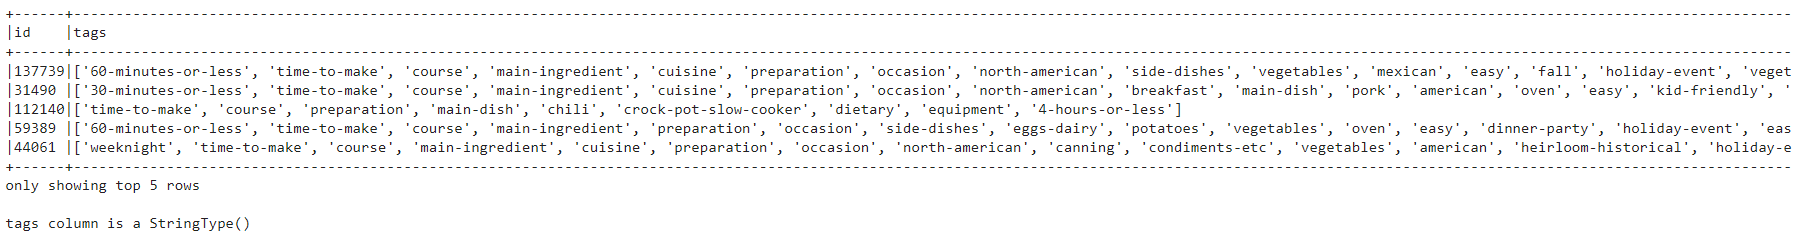

Sample outout

Tags column in array of ArrayType(StringType())

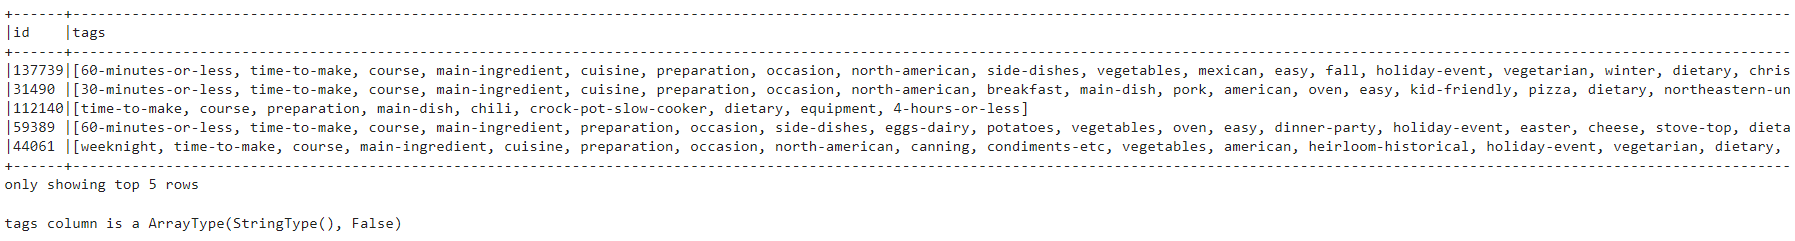

### Solution to Task 4
Complete the code in the following cell

In [ ]:
# Task 04 Cell 1 out of 1
import findspark
findspark.init()
import pyspark
from pyspark.sql.functions import split, col
raw_recipes_df = (raw_recipes_df
                  .withColumn('tags', F.regexp_replace("tags","[\\[\\]\\']","")
                             )
                  .withColumn('tags', F.split("tags",", ")
                             )
                 )

In [ ]:
raw_recipes_df.printSchema()

Test cases for Task 04

In [ ]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_recipes_df.schema["tags"].dataType == ArrayType(StringType(), True), "You have not split the string into an array."
assert raw_recipes_df.collect()[2][5] == ['time-to-make','course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment'

In [ ]:
raw_recipes_df.schema["tags"].dataType == ArrayType(StringType(), True)

In [ ]:
raw_recipes_df.collect()[2][5] == ['time-to-make','course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-l

### Join Recipe Data to Review Data

In [ ]:
# Reading the second data set. 
# keep this cell unedited

raw_ratings_df = (spark.read.csv("RAW_interactions_cleaned.csv", 
                                 header=True, 
                                 inferSchema= True)
                  .withColumn("review_date",  F.col("date"))
                  .drop(F.col("date"))
                  )

In [ ]:
raw_ratings_df.printSchema()

In [ ]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_ratings_df.count() == 1132367, "There is a mistake in reading the data."
assert len(raw_ratings_df.columns) == 5, "There is a mistake in reading the data."

In [ ]:
raw_ratings_df.show(5)

### Task 05: Read the second data file
Along with raw recipes data, we also have raw ratings data.

The code to read the data is already written above. Your task is to join the raw ratings and raw recipes data.

The resulting dataframe must have the same number of rows as in the raw ratings data.

Join both the dataframes using the recipie IDs.

Sample Input

raw recipes_df and raw_ratings_df

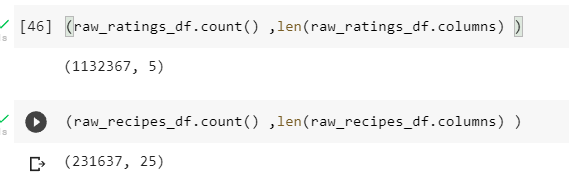

Sample Output

Combined dataframe with 30 columns and 1132367 rows

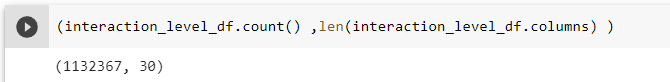

Calculation explanation

There are 25 columns in the raw_recipes_df and five in the raw_ratings_df. So total columns in the combined dataframe 25 + 5 = 30

The number of rows in the combined dataframe must be the same as the rows in the raw_ratings_df. So total rows in combined dataframe 1132367

We have included some test cases given below. You can use them to check if you have completed the task correctly.

#### Solution to Task 5

In [ ]:
# Task 05 Cell 1 out of 1

interaction_level_df = raw_ratings_df.join(raw_recipes_df,raw_ratings_df.recipe_id==raw_recipes_df.id,"inner"
                                           # add the key on which the join should happen
                                           # mention the type of join expected. 
                                           )

In [ ]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert (interaction_level_df.count() ,len(interaction_level_df.columns)) == (1132367, 30), "The type of join is incorrect"

list1 = raw_ratings_df.select('recipe_id').collect()
list2 = raw_recipes_df.select('id').collect()
exclusive_set = set(list1)-set(list2)

assert len(exclusive_set) == 0, "There is a mistake in reading one of the two data files."

In [ ]:
(interaction_level_df.count() ,len(interaction_level_df.columns)) == (1132367, 30)

In [ ]:
len(exclusive_set) == 0

### Task 06: Create time-based features
Currently, both the date columns, the submitted date, and the review date are in string forms.

First convert the submitted and review_date to DateType()

Use review date and submission date to derive new features:

days_since_submission_on_review_date Number of days between the recipe submission and the current review.
months_since_submission_on_review_date Number of months between the recipe submission and the current review.
years_since_submission_on_review_dateNumber of years between the recipe submission and the current review.
Sample input

The following columns need to be used to calculate the time based features.

Sample input

The following columns need to be used to calculate the time based features.

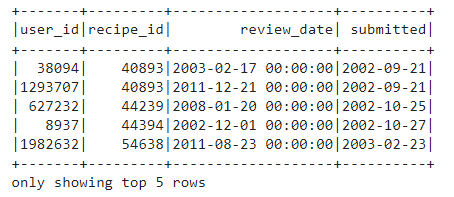

Sample Output:

New date based features have been added to the interactions dataframe

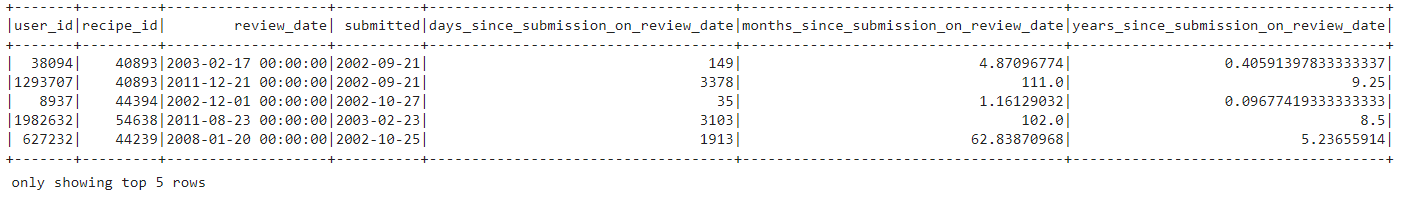

Sample Calculation

Recipe 40893 was submitted on 2002-09-21 User 38094 reviewed recipe 40893 on 2003-02-17

days_since_submission_on_review_date number of calender days between 2002-09-21 and 2003-02-17 that is 149

months_since_submission_on_review_date number of calender months between 2002-09-21 and 2003-02-17 that is 4.87 (calculated by a pyspark function)

years_since_submission_on_review_date number of calender months divided by 12 that is 0.40

#### Solution to Task 6

In [ ]:
# Task 06 Cell 1 out of 2

interaction_level_df = (interaction_level_df
                        .withColumn('submitted',F.col("submitted").cast("date") # pyspark function to cast a column to DateType()
                                   )
                        .withColumn('review_date',F.col("review_date").cast("date") # pyspark function to cast a column to DateType()
                                   )
                                             
                       )

In [ ]:
interaction_level_df = (interaction_level_df
                        .withColumn('days_since_submission_on_review_date',F.datediff("review_date","submitted")
                                     # Pyspark function to find the number of days between two dates              
                                   )
                        .withColumn('months_since_submission_on_review_date',F.months_between("review_date","submitted")
                                     # Pyspark function to find the number of months between two dates          
                                   )
                        .withColumn('years_since_submission_on_review_date',F.months_between("review_date","submitted")/12
                                     # Pyspark function to find the number of months between two dates / 12          
                                   )
                         )

In [ ]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert interaction_level_df.schema["days_since_submission_on_review_date"].dataType == IntegerType()

assert (interaction_level_df.filter((interaction_level_df.user_id == 428885) & (interaction_level_df.recipe_id == 335241))
                            .select('days_since_submission_on_review_date').collect()[0][0]) == 77
assert (interaction_level_df.filter((interaction_level_df.user_id == 2025676) & (interaction_level_df.recipe_id == 94265))
                            .select('months_since_submission_on_review_date').collect()[0][0]) == 153.22580645
assert (interaction_level_df.filter((interaction_level_df.user_id == 338588) & (interaction_level_df.recipe_id == 21859))
                            .select('years_since_submission_on_review_date').collect()[0][0]) == 4.564516129166667

In [ ]:
interaction_level_df.schema["days_since_submission_on_review_date"].dataType == IntegerType()

In [ ]:
(interaction_level_df.filter((interaction_level_df.user_id == 428885) & (interaction_level_df.recipe_id == 335241))
                            .select('days_since_submission_on_review_date').collect()[0][0]) == 77

In [ ]:
(interaction_level_df.filter((interaction_level_df.user_id == 2025676) & (interaction_level_df.recipe_id == 94265))
                            .select('months_since_submission_on_review_date').collect()[0][0]) == 153.22580645

In [ ]:
(interaction_level_df.filter((interaction_level_df.user_id == 338588) & (interaction_level_df.recipe_id == 21859))
                            .select('years_since_submission_on_review_date').collect()[0][0]) == 4.564516129166667

### Save the data we have created so far in a parquet file.

In [ ]:
interaction_level_df.printSchema()

In [ ]:
assert (interaction_level_df.count() ,len(interaction_level_df.columns) ) == (1132367, 33)

In [ ]:
(interaction_level_df.count() ,len(interaction_level_df.columns) ) == (1132367, 33)

In [ ]:
## Write the raw_recipes_df
## create a folder named data in you current directry before running this. 

from pyspark.sql import SparkSession
interaction_level_df.write.parquet("interaction_level_df") # Modify the path as you need

In [ ]:
interaction_level_df.show(5)

### EDA

### Initial Setup

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark

In [ ]:
# Run this everytime you create a new spark instance. 

spark.sparkContext.install_pypi_package("plotly==5.5.0")
spark.sparkContext.install_pypi_package("pandas==0.25.1")
spark.sparkContext.install_pypi_package("numpy==1.14.5")
spark.sparkContext.install_pypi_package("matplotlib==3.1.1")

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.feature import Bucketizer
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import for typecasting columns
from pyspark.sql.types import IntegerType,BooleanType,DateType,FloatType,StringType
from pyspark.sql.types import ArrayType

### Defining Custom Functions

In [ ]:
def get_quantiles(df, col_name, quantiles_list = [0.01, 0.25, 0.5, 0.75, 0.99]):
    """
    Takes a numerical column and returns column values at requested quantiles

    Inputs 
    Argument 1: Dataframe
    Argument 2: Name of the column
    Argument 3: A list of quantiles you want to find. Default value [0.01, 0.25, 0.5, 0.75, 0.99]

    Output 
    Returns a dictionary with quantiles as keys and column quantile values as values 
    """
    # Get min, max and quantile values for given column
    min_val = df.agg(F.min(col_name)).first()[0]
    max_val = df.agg(F.max(col_name)).first()[0]
    quantiles_vals = df.approxQuantile(col_name,
                                       quantiles_list,
                                       0)
  
    # Store min, quantiles and max in output dict, sequentially
    quantiles_dict = {0.0:min_val}
    quantiles_dict.update(dict(zip(quantiles_list, quantiles_vals)))
    quantiles_dict.update({1.0:max_val})
    return(quantiles_dict)

In [ ]:
def plot_bucketwise_statistics (summary, bucketizer):
    """
    Takes in a dataframe and a bucketizer object and plots the summary statistics for each bucket in the dataframe. 
  
    Inputs
    Argument 1: Pandas dataframe obtained from bucket_col_print_summary function 
    Argument 2: Bucketizer object obtained from bucket_col_print_summary function
  
    Output
    Displays a plot of bucketwise average ratings nunber of ratings of a parameter.   
    """
    # Creating bucket labels from splits
    classlist = bucketizer.getSplits()
    number_of_classes = len(classlist) - 1

    class_labels = []
    hover_labels = []
    for i in range (number_of_classes):
        hover_labels.append(str(classlist[i])+"-"+str(classlist[i+1]) +" (Bucket name: "+ str(int(i)) +")"  )
        class_labels.append(str(classlist[i])+"-"+str(classlist[i+1]) )
  
    summary["Scaled_number"] = (summary["n_ratings"]-summary["n_ratings"].min())/(summary["n_ratings"].max()-summary["n_ratings"].min()) + 1.5
    summary['Bucket_Names'] = class_labels
  
    # making plot
    x = summary["Bucket_Names"]
    y1 = summary["avg_rating"]
    y2 = summary["n_ratings"]
    err = summary["stddev_rating"]  

    # Plot scatter here
    plt.rcParams["figure.figsize"] = [summary.shape[0]+2, 6.0]
    plt.rcParams["figure.autolayout"] = True
    fig, ax1 = plt.subplots()

    bar = ax1.bar(x, y1, color = "#262261")
    ax1.errorbar(x, y1, yerr=err, fmt="o", color="#EE4036")
    ax1.set(ylim=(0, 7))
  
    #ax1.bar_label(bar , fmt='%.2f', label_type='edge')  
    def barlabel(x_list,y_list):
        for i in range(len(x_list)):
            ax1.text(i,y_list[i] + 0.2,y_list[i], ha = 'center',
  			         fontdict=dict(size=10),
  			         bbox=dict(facecolor='#262261', alpha=0.2)         
  			        )
    barlabel(summary["Bucket_Names"].tolist() ,summary["avg_rating"].round(2).tolist())
  
    ax2 = ax1.twinx()
    ax2.scatter(x, y2, s=summary["Scaled_number"]*500, c = '#FAAF40')  
    ax2.set(ylim=(0, summary["n_ratings"].max()*1.15))
    def scatterlabel(x_list,y_list):
  	    for i in range(len(x_list)):
  		    ax2.text(i,y_list[i] + 15000,y_list[i], ha = 'center',
  					 fontdict=dict(size=10),
                     bbox=dict(facecolor='#FAAF40', alpha=0.5)
  					)
    scatterlabel(summary["Bucket_Names"].tolist() ,summary["n_ratings"].tolist())
  
    # giving labels to the axises
    ax1.set_xlabel(bucketizer.getOutputCol(), fontdict=dict(size=14)) 
    ax1.set_ylabel("Average Ratings",fontdict=dict(size=14))
  
    # secondary y-axis label
    ax2.set_ylabel('Number of Ratings',fontdict=dict(size=14))
  
    #plot Title
    plt.title('Bucketwise average ratings and number of ratings for \n'+bucketizer.getInputCol(), 
              fontdict=dict(size=14))  

In [ ]:
def bucket_col_print_summary(df, splits, inputCol, outputCol):
    """
    Given a numerical column in a data frame, adds a bucketized version of the column to the data frame, according to splits provided.
    Also prints a summary of ratings seen in each bucket made.

    Inputs 
    Argument 1: Data Frame 
    Argument 2: Values at which the column will be split
    Argument 3: Name of the input column (numerical column)
    Argument 4: Name of the output column (bucketized numerical column)

    Output: 
    1) New dataframe with the output column added
    2) Bucketizer object trained from the input column 
    3) Pandas dataframe with summary statistics for ratings seen in buckets of the output column
    Also plots summary statistics for ratings seen in buckets of the output column
    """

    # Dropping bucket if it already exists
    if outputCol in df.columns:
        df = df.drop(outputCol)

    # Training bucketizer
    bucketizer = Bucketizer(splits = splits,
                            inputCol  = inputCol,
                            outputCol = outputCol)
    
    df = bucketizer.setHandleInvalid("keep").transform(df)

    # Printing meta information on buckets created
    print("Added bucketized column {}".format(outputCol))
    print("")
    print("Bucketing done for split definition: {}".format(splits))
    print("")  
    print("Printing summary statistics for ratings in buckets below:")

    # Creating a summary statistics dataframe and passing it to the plotting function
    summary =  (df
                .groupBy(outputCol)
                .agg(F.avg('rating').alias('avg_rating'),
                     F.stddev('rating').alias('stddev_rating'),
                     F.count('rating').alias('n_ratings'))
                .sort(outputCol)
                .toPandas())
  
    plot_bucketwise_statistics(summary,bucketizer)
  
    return df, bucketizer, summary

In [ ]:
def get_column_distribution_summary(df, col_name):
    """
    Takes a column in a data frame and prints the summary statistics (average, standard deviation, count and distinct count) for all unique values in that column.
  
    Inputs 
    Argument 1: Dataframe 
    Argument 2: Name of the column
  
    Output
    Returns nothing 
    Prints a Dataframe with summary statistics
    """
    print(df
          .groupBy(col_name)
          .agg(F.avg('rating').alias('avg_rating'),
               F.stddev('rating').alias('stddev_rating'),
               F.count('rating').alias('n_ratings'),
               F.countDistinct('id').alias('n_recipes'))
          .sort(F.col(col_name).asc())
          .show(50))

In [ ]:
def get_n_items_satisfying_condition (df, condition, aggregation_level = "recipe"):
    """
    Given a condition, find the number of recipes / reviews that match the condition.
    Also calculates the percentage of such recipes / reviews as a percentage of all recipes / reviews.
  
    Inputs 
    Argument 1: Dataframe 
    Argument 2: Logical expression describing a condition, string type. eg: "minutes == 0"
    Argument 3: Aggregation level for determining "items", either  "recipe" or "review". Default value == "recipe"
  
    Output: Returns no object.
    Prints the following:
    1) Number of recipes / reviews that satisfy the condition
    2) Total number of recipes / reviews in the dataframe
    3) Percentage of recipes / reviews that satisfy the condition
    """
    # Find out num rows satisfying the condition
    if aggregation_level == "recipe": 
        number_of_rows_satisfying_condition = (df
                                             .filter(condition)
                                             .agg(F.countDistinct("id"))).first()[0]
      
        n_rows_total = (df.agg(F.countDistinct("id"))).first()[0]
    if aggregation_level == "review":
        number_of_rows_satisfying_condition = (df
                                             .filter(condition)
                                             .agg(F.countDistinct("id","user_id"))).first()[0]
        n_rows_total = (df.agg(F.countDistinct("id","user_id"))).first()[0]
  
    # Find out % rows satisfying the conditon and print a properly formatted output
    perc_rows = round(number_of_rows_satisfying_condition * 100/ n_rows_total, 2)
    print('Condition String                   : "{}"'.format(condition))
    print("Num {}s Satisfying Condition   : {} [{}%]".format(aggregation_level.title(), number_of_rows_satisfying_condition, perc_rows))
    print("Total Num {}s                  : {}".format(aggregation_level.title(), n_rows_total))

### Read the data

In [ ]:
interaction_level_df_processed = spark.read.parquet("interaction_level_df")

In [ ]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert interaction_level_df.count() == 1132367, "There is a mistake in reading the data."
assert len(interaction_level_df.columns) == 33, "There is a mistake in reading the data."

In [ ]:
interaction_level_df.show(5)

### Bucketing and Cleaning Numerical Features

1. years_since_submission_on_review_date
[Review Time Since Submission]

Recipes more than 6 years old are rated low

In [ ]:
get_quantiles(df = interaction_level_df,
             col_name = "years_since_submission_on_review_date")

In [ ]:
get_n_items_satisfying_condition(df = interaction_level_df,
                                 condition= 'years_since_submission_on_review_date < 0',
                                 aggregation_level= "review")

In [ ]:
# Only keep interactions with review dates >= recipe submission date

interaction_level_df = (interaction_level_df
                        .filter('years_since_submission_on_review_date >= 0'))

In [ ]:
splits = [ 0, 1, 3, 6, float('Inf')]
inputCol  = "years_since_submission_on_review_date"
outputCol = "years_since_submission_on_review_date_bucket"

(interaction_level_df, submission_time_bucketizer, submission_time_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

2. minutes
[prep time]

Somewhat relevant
Low prep time is preferred

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.feature import Bucketizer
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import for typecasting columns
from pyspark.sql.types import IntegerType,BooleanType,DateType,FloatType,StringType
from pyspark.sql.types import ArrayType

In [ ]:
get_quantiles(df = interaction_level_df,
              col_name = "minutes",
              quantiles_list=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

In [ ]:
# Capping prep time at 930 minutes

interaction_level_df = (interaction_level_df
                        .withColumn("minutes",
                                    F.when(interaction_level_df["minutes"] > 930, 930)
                                     .otherwise(interaction_level_df["minutes"])))

In [ ]:
# investigating recipes with minutes = 0 -> Look at n_steps for such recipes.

get_column_distribution_summary(df = (interaction_level_df
                                      .filter('minutes == 0')
                                      .withColumn('n_steps_modified', (F.when(interaction_level_df['n_steps'] >= 10, ">= 10")
                                                                        .otherwise(F.lpad(interaction_level_df['n_steps'],2,"0"))))),
                                col_name = 'n_steps_modified')

In [ ]:
# let's look at some examples with 1 step only to see if this makes sense

interaction_level_df.filter('minutes == 0 and n_steps == 1').show(5)

In [ ]:
get_n_items_satisfying_condition(df = interaction_level_df,
                                 condition = 'minutes == 0',
                                 aggregation_level = "recipe")

In [ ]:
# Remove recipes with cook time zero

interaction_level_df = interaction_level_df.filter("minutes > 0")

In [ ]:
splits = [0, 5, 15, 30, 60, 300, 900, float('Inf')]
inputCol  = "minutes"
outputCol = "prep_time_bucket"

(interaction_level_df, prep_time_bucketizer, prep_time_summary_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

3. n_steps

Clearly relevant
Recipes with less than 2 steps are rated high
Recipes with more than 29 steps are rated very low

In [ ]:
get_quantiles(df = interaction_level_df,
              col_name = "n_steps")

In [ ]:
interaction_level_df.filter('n_steps == 0').show(5, truncate = False)

In [2]:
get_n_items_satisfying_condition(df = interaction_level_df,
                                 condition = 'n_steps == 0',
                                 aggregation_level = "recipe")

NameError: name 'get_n_items_satisfying_condition' is not defined

In [ ]:
# Remove recipes with n_steps zero

interaction_level_df = interaction_level_df.filter("n_steps > 0")

In [ ]:
splits = [0, 2, 6, 8, 12, 29, float('Inf')]
inputCol  = "n_steps"
outputCol = "n_steps_bucket"

(interaction_level_df, n_steps_bucketizer, n_steps_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

4. n_ingredients

Not relevant

In [ ]:
get_quantiles(df = interaction_level_df,
              col_name = "n_ingredients")

In [ ]:
splits = [0, 6, 9, 11, float('Inf')]
inputCol  = "n_ingredients"
outputCol = "n_ingredients_bucket"

(interaction_level_df, n_ingredients_bucketizer, n_ingredients_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

5. nutrition columns

calories - Calories per serving seems irrelevant
fat (per 100 cal) - Calories per serving seems irrelevant
sugar (per 100 cal) - Calories per serving seems irrelevant
sodium (per 100 cal) - Calories per serving seems irrelevant
protein (per 100 cal) - Calories per serving seems irrelevant
sat. fat (per 100 cal) - Calories per serving seems irrelevant
carbs (per 100 cal) - Calories per serving seems irrelevant

In [ ]:
interaction_level_df.columns 

In [ ]:
nutrition_cols = ['calories', 
                  'total_fat_PDV', 
                  'sugar_PDV', 
                  'sodium_PDV', 
                  'protein_PDV', 
                  'saturated_fat_PDV', 
                  'carbohydrates_PDV', 
                  'total_fat_per_100_cal', 
                  'sugar_per_100_cal', 
                  'sodium_per_100_cal', 
                  'protein_per_100_cal', 
                  'saturated_fat_per_100_cal', 
                  'carbohydrates_per_100_cal']

quantiles_list = [0.00, 0.05, 0.25, 0.5, 0.75, 0.95, 1.00]
nutrition_col_quantiles = pd.DataFrame(index = quantiles_list)

In [ ]:
for col in nutrition_cols:
    nutrition_col_quantiles[col] = (get_quantiles(df = interaction_level_df,
                                                col_name = col,
                                                quantiles_list=quantiles_list)
                                  .values())

In [ ]:
nutrition_col_quantile_summary = pd.DataFrame(index = ["0.00-0.25", "0.25-0.50", "0.50-0.75", "0.75-0.95", "0.95 - 1.00"])

for col in nutrition_cols:
    splits = ([0]
            + list(nutrition_col_quantiles.loc[[0.25, 0.5, 0.75, 0.95], col].round())
            + [float('Inf')])
    inputCol  = col
    outputCol = col+"_bucket"

    if outputCol in interaction_level_df.columns:
        interaction_level_df = interaction_level_df.drop(outputCol)

  # Training bucketizer
    bucketizer = Bucketizer(splits = splits,
                          inputCol  = inputCol,
                          outputCol = outputCol)
  
    interaction_level_df = bucketizer.setHandleInvalid("keep").transform(interaction_level_df)
  
    nutrition_col_quantile_summary.loc[:, col] = (interaction_level_df
                                                .groupBy(outputCol)
                                                .agg(F.avg('rating').alias('avg_rating'))
                                                .sort(outputCol)
                                                .select('avg_rating').toPandas().values)

In [ ]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [ ]:
nutrition_col_quantile_summary

In [ ]:
## Writing the modified data to S3 
interaction_level_df.write.parquet("interaction_level_df_processed_data")

### Feature Extraction Part-2

### Initial Setup

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark

In [ ]:
# Run this everytime you create a new spark instance. 

spark.sparkContext.install_pypi_package("plotly==5.5.0")
spark.sparkContext.install_pypi_package("pandas==0.25.1")
spark.sparkContext.install_pypi_package("numpy==1.14.5")
spark.sparkContext.install_pypi_package("matplotlib==3.1.1")

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.feature import Bucketizer
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import for typecasting columns
from pyspark.sql.types import IntegerType,BooleanType,DateType,FloatType,StringType
from pyspark.sql.types import ArrayType

### Defining Custom Functions

In [ ]:
def get_quantiles(df, col_name, quantiles_list = [0.01, 0.25, 0.5, 0.75, 0.99]):
    """
    Takes a numerical column and returns column values at requested quantiles

    Inputs 
    Argument 1: Dataframe
    Argument 2: Name of the column
    Argument 3: A list of quantiles you want to find. Default value [0.01, 0.25, 0.5, 0.75, 0.99]

    Output 
    Returns a dictionary with quantiles as keys and column quantile values as values 
    """
    # Get min, max and quantile values for given column
    min_val = df.agg(F.min(col_name)).first()[0]
    max_val = df.agg(F.max(col_name)).first()[0]
    quantiles_vals = df.approxQuantile(col_name,
                                       quantiles_list,
                                       0)
  
    # Store min, quantiles and max in output dict, sequentially
    quantiles_dict = {0.0:min_val}
    quantiles_dict.update(dict(zip(quantiles_list, quantiles_vals)))
    quantiles_dict.update({1.0:max_val})
    return(quantiles_dict)

In [ ]:
def plot_bucketwise_statistics (summary, bucketizer):
    """
    Takes in a dataframe and a bucketizer object and plots the summary statistics for each bucket in the dataframe. 
  
    Inputs
    Argument 1: Pandas dataframe obtained from bucket_col_print_summary function 
    Argument 2: Bucketizer object obtained from bucket_col_print_summary function
  
    Output
    Displays a plot of bucketwise average ratings nunber of ratings of a parameter.   
    """
    # Creating bucket labels from splits
    classlist = bucketizer.getSplits()
    number_of_classes = len(classlist) - 1

    class_labels = []
    hover_labels = []
    for i in range (number_of_classes):
        hover_labels.append(str(classlist[i])+"-"+str(classlist[i+1]) +" (Bucket name: "+ str(int(i)) +")"  )
        class_labels.append(str(classlist[i])+"-"+str(classlist[i+1]) )
  
    summary["Scaled_number"] = (summary["n_ratings"]-summary["n_ratings"].min())/(summary["n_ratings"].max()-summary["n_ratings"].min()) + 1.5
    summary['Bucket_Names'] = class_labels
  
    # making plot
    x = summary["Bucket_Names"]
    y1 = summary["avg_rating"]
    y2 = summary["n_ratings"]
    err = summary["stddev_rating"]  

    # Plot scatter here
    plt.rcParams["figure.figsize"] = [summary.shape[0]+2, 6.0]
    plt.rcParams["figure.autolayout"] = True
    fig, ax1 = plt.subplots()

    bar = ax1.bar(x, y1, color = "#262261")
    ax1.errorbar(x, y1, yerr=err, fmt="o", color="#EE4036")
    ax1.set(ylim=(0, 7))
  
    #ax1.bar_label(bar , fmt='%.2f', label_type='edge')  
    def barlabel(x_list,y_list):
        for i in range(len(x_list)):
            ax1.text(i,y_list[i] + 0.2,y_list[i], ha = 'center',
  			         fontdict=dict(size=10),
  			         bbox=dict(facecolor='#262261', alpha=0.2)         
  			        )
    barlabel(summary["Bucket_Names"].tolist() ,summary["avg_rating"].round(2).tolist())
  
    ax2 = ax1.twinx()
    ax2.scatter(x, y2, s=summary["Scaled_number"]*500, c = '#FAAF40')  
    ax2.set(ylim=(0, summary["n_ratings"].max()*1.15))
    def scatterlabel(x_list,y_list):
  	    for i in range(len(x_list)):
  		    ax2.text(i,y_list[i] + 15000,y_list[i], ha = 'center',
  					 fontdict=dict(size=10),
                     bbox=dict(facecolor='#FAAF40', alpha=0.5)
  					)
    scatterlabel(summary["Bucket_Names"].tolist() ,summary["n_ratings"].tolist())
  
    # giving labels to the axises
    ax1.set_xlabel(bucketizer.getOutputCol(), fontdict=dict(size=14)) 
    ax1.set_ylabel("Average Ratings",fontdict=dict(size=14))
  
    # secondary y-axis label
    ax2.set_ylabel('Number of Ratings',fontdict=dict(size=14))
  
    #plot Title
    plt.title('Bucketwise average ratings and number of ratings for \n'+bucketizer.getInputCol(), 
              fontdict=dict(size=14))  

In [ ]:
def bucket_col_print_summary(df, splits, inputCol, outputCol):
    """
    Given a numerical column in a data frame, adds a bucketized version of the column to the data frame, according to splits provided.
    Also prints a summary of ratings seen in each bucket made.

    Inputs 
    Argument 1: Data Frame 
    Argument 2: Values at which the column will be split
    Argument 3: Name of the input column (numerical column)
    Argument 4: Name of the output column (bucketized numerical column)

    Output: 
    1) New dataframe with the output column added
    2) Bucketizer object trained from the input column 
    3) Pandas dataframe with summary statistics for ratings seen in buckets of the output column
    Also plots summary statistics for ratings seen in buckets of the output column
    """

    # Dropping bucket if it already exists
    if outputCol in df.columns:
        df = df.drop(outputCol)

    # Training bucketizer
    bucketizer = Bucketizer(splits = splits,
                            inputCol  = inputCol,
                            outputCol = outputCol)
    
    df = bucketizer.setHandleInvalid("keep").transform(df)

    # Printing meta information on buckets created
    print("Added bucketized column {}".format(outputCol))
    print("")
    print("Bucketing done for split definition: {}".format(splits))
    print("")  
    print("Printing summary statistics for ratings in buckets below:")

    # Creating a summary statistics dataframe and passing it to the plotting function
    summary =  (df
                .groupBy(outputCol)
                .agg(F.avg('rating').alias('avg_rating'),
                     F.stddev('rating').alias('stddev_rating'),
                     F.count('rating').alias('n_ratings'))
                .sort(outputCol)
                .toPandas())
  
    plot_bucketwise_statistics(summary,bucketizer)
  
    return df, bucketizer, summary

In [ ]:
def get_column_distribution_summary(df, col_name):
    """
    Takes a column in a data frame and prints the summary statistics (average, standard deviation, count and distinct count) for all unique values in that column.
  
    Inputs 
    Argument 1: Dataframe 
    Argument 2: Name of the column
  
    Output
    Returns nothing 
    Prints a Dataframe with summary statistics
    """
    print(df
          .groupBy(col_name)
          .agg(F.avg('rating').alias('avg_rating'),
               F.stddev('rating').alias('stddev_rating'),
               F.count('rating').alias('n_ratings'),
               F.countDistinct('id').alias('n_recipes'))
          .sort(F.col(col_name).asc())
          .show(50))

In [ ]:
def get_n_items_satisfying_condition (df, condition, aggregation_level = "recipe"):
    """
    Given a condition, find the number of recipes / reviews that match the condition.
    Also calculates the percentage of such recipes / reviews as a percentage of all recipes / reviews.
  
    Inputs 
    Argument 1: Dataframe 
    Argument 2: Logical expression describing a condition, string type. eg: "minutes == 0"
    Argument 3: Aggregation level for determining "items", either  "recipe" or "review". Default value == "recipe"
  
    Output: Returns no object.
    Prints the following:
    1) Number of recipes / reviews that satisfy the condition
    2) Total number of recipes / reviews in the dataframe
    3) Percentage of recipes / reviews that satisfy the condition
    """
    # Find out num rows satisfying the condition
    if aggregation_level == "recipe": 
        number_of_rows_satisfying_condition = (df
                                             .filter(condition)
                                             .agg(F.countDistinct("id"))).first()[0]
      
        n_rows_total = (df.agg(F.countDistinct("id"))).first()[0]
    if aggregation_level == "review":
        number_of_rows_satisfying_condition = (df
                                             .filter(condition)
                                             .agg(F.countDistinct("id","user_id"))).first()[0]
        n_rows_total = (df.agg(F.countDistinct("id","user_id"))).first()[0]
  
    # Find out % rows satisfying the conditon and print a properly formatted output
    perc_rows = round(number_of_rows_satisfying_condition * 100/ n_rows_total, 2)
    print('Condition String                   : "{}"'.format(condition))
    print("Num {}s Satisfying Condition   : {} [{}%]".format(aggregation_level.title(), number_of_rows_satisfying_condition, perc_rows))
    print("Total Num {}s                  : {}".format(aggregation_level.title(), n_rows_total))

### Read the data

In [ ]:
interaction_level_df_processed = spark.read.parquet("interaction_level_df")

In [ ]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert interaction_level_df.count() == 1132367, "There is a mistake in reading the data."
assert len(interaction_level_df.columns) == 33, "There is a mistake in reading the data."

In [ ]:
interaction_level_df.show(5)

### Bucketing and Cleaning Numerical Features

1. years_since_submission_on_review_date
[Review Time Since Submission]

Recipes more than 6 years old are rated low

In [ ]:
get_quantiles(df = interaction_level_df,
             col_name = "years_since_submission_on_review_date")

In [ ]:
get_n_items_satisfying_condition(df = interaction_level_df,
                                 condition= 'years_since_submission_on_review_date < 0',
                                 aggregation_level= "review")

In [ ]:
# Only keep interactions with review dates >= recipe submission date

interaction_level_df = (interaction_level_df
                        .filter('years_since_submission_on_review_date >= 0'))

In [ ]:
splits = [ 0, 1, 3, 6, float('Inf')]
inputCol  = "years_since_submission_on_review_date"
outputCol = "years_since_submission_on_review_date_bucket"

(interaction_level_df, submission_time_bucketizer, submission_time_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

2. minutes
[prep time]

Somewhat relevant
Low prep time is preferred

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.feature import Bucketizer
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import for typecasting columns
from pyspark.sql.types import IntegerType,BooleanType,DateType,FloatType,StringType
from pyspark.sql.types import ArrayType

In [ ]:
get_quantiles(df = interaction_level_df,
              col_name = "minutes",
              quantiles_list=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

In [ ]:
# Capping prep time at 930 minutes

interaction_level_df = (interaction_level_df
                        .withColumn("minutes",
                                    F.when(interaction_level_df["minutes"] > 930, 930)
                                     .otherwise(interaction_level_df["minutes"])))

In [ ]:
# investigating recipes with minutes = 0 -> Look at n_steps for such recipes.

get_column_distribution_summary(df = (interaction_level_df
                                      .filter('minutes == 0')
                                      .withColumn('n_steps_modified', (F.when(interaction_level_df['n_steps'] >= 10, ">= 10")
                                                                        .otherwise(F.lpad(interaction_level_df['n_steps'],2,"0"))))),
                                col_name = 'n_steps_modified')

In [ ]:
# let's look at some examples with 1 step only to see if this makes sense

interaction_level_df.filter('minutes == 0 and n_steps == 1').show(5)

In [ ]:
get_n_items_satisfying_condition(df = interaction_level_df,
                                 condition = 'minutes == 0',
                                 aggregation_level = "recipe")

In [ ]:
# Remove recipes with cook time zero

interaction_level_df = interaction_level_df.filter("minutes > 0")

In [ ]:
splits = [0, 5, 15, 30, 60, 300, 900, float('Inf')]
inputCol  = "minutes"
outputCol = "prep_time_bucket"

(interaction_level_df, prep_time_bucketizer, prep_time_summary_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

3. n_steps

Clearly relevant
Recipes with less than 2 steps are rated high
Recipes with more than 29 steps are rated very low

In [ ]:
get_quantiles(df = interaction_level_df,
              col_name = "n_steps")

In [ ]:
interaction_level_df.filter('n_steps == 0').show(5, truncate = False)

In [ ]:
get_n_items_satisfying_condition(df = interaction_level_df,
                                 condition = 'n_steps == 0',
                                 aggregation_level = "recipe")

In [ ]:
# Remove recipes with n_steps zero

interaction_level_df = interaction_level_df.filter("n_steps > 0")

In [ ]:
splits = [0, 2, 6, 8, 12, 29, float('Inf')]
inputCol  = "n_steps"
outputCol = "n_steps_bucket"

(interaction_level_df, n_steps_bucketizer, n_steps_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

4. n_ingredients

Not relevant

In [ ]:
get_quantiles(df = interaction_level_df,
              col_name = "n_ingredients")

In [ ]:
splits = [0, 6, 9, 11, float('Inf')]
inputCol  = "n_ingredients"
outputCol = "n_ingredients_bucket"

(interaction_level_df, n_ingredients_bucketizer, n_ingredients_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

5. nutrition columns

calories - Calories per serving seems irrelevant
fat (per 100 cal) - Calories per serving seems irrelevant
sugar (per 100 cal) - Calories per serving seems irrelevant
sodium (per 100 cal) - Calories per serving seems irrelevant
protein (per 100 cal) - Calories per serving seems irrelevant
sat. fat (per 100 cal) - Calories per serving seems irrelevant
carbs (per 100 cal) - Calories per serving seems irrelevant

In [ ]:
interaction_level_df.columns 

In [ ]:
nutrition_cols = ['calories', 
                  'total_fat_PDV', 
                  'sugar_PDV', 
                  'sodium_PDV', 
                  'protein_PDV', 
                  'saturated_fat_PDV', 
                  'carbohydrates_PDV', 
                  'total_fat_per_100_cal', 
                  'sugar_per_100_cal', 
                  'sodium_per_100_cal', 
                  'protein_per_100_cal', 
                  'saturated_fat_per_100_cal', 
                  'carbohydrates_per_100_cal']

quantiles_list = [0.00, 0.05, 0.25, 0.5, 0.75, 0.95, 1.00]
nutrition_col_quantiles = pd.DataFrame(index = quantiles_list)

In [ ]:
for col in nutrition_cols:
    nutrition_col_quantiles[col] = (get_quantiles(df = interaction_level_df,
                                                col_name = col,
                                                quantiles_list=quantiles_list)
                                  .values())

In [ ]:
nutrition_col_quantile_summary = pd.DataFrame(index = ["0.00-0.25", "0.25-0.50", "0.50-0.75", "0.75-0.95", "0.95 - 1.00"])

for col in nutrition_cols:
    splits = ([0]
            + list(nutrition_col_quantiles.loc[[0.25, 0.5, 0.75, 0.95], col].round())
            + [float('Inf')])
    inputCol  = col
    outputCol = col+"_bucket"

    if outputCol in interaction_level_df.columns:
        interaction_level_df = interaction_level_df.drop(outputCol)

  # Training bucketizer
    bucketizer = Bucketizer(splits = splits,
                          inputCol  = inputCol,
                          outputCol = outputCol)
  
    interaction_level_df = bucketizer.setHandleInvalid("keep").transform(interaction_level_df)
  
    nutrition_col_quantile_summary.loc[:, col] = (interaction_level_df
                                                .groupBy(outputCol)
                                                .agg(F.avg('rating').alias('avg_rating'))
                                                .sort(outputCol)
                                                .select('avg_rating').toPandas().values)

In [ ]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [ ]:
nutrition_col_quantile_summary

In [ ]:
## Writing the modified data to S3 
interaction_level_df.write.parquet("interaction_level_df_processed_data")

### Feature Extraction Part-2

### Initial Setup

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [ ]:
spark

In [ ]:
# Run this everytime you create a new spark instance. 

spark.sparkContext.install_pypi_package("plotly==5.5.0")
spark.sparkContext.install_pypi_package("pandas==0.25.1")
spark.sparkContext.install_pypi_package("numpy==1.14.5")
spark.sparkContext.install_pypi_package("matplotlib==3.1.1")

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.feature import Bucketizer
from pyspark.sql.window import Window
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import for typecasting columns
from pyspark.sql.types import IntegerType,BooleanType,DateType,FloatType,StringType
from pyspark.sql.types import ArrayType

### Defining Custom Functions

In [ ]:
def get_quantiles(df, col_name, quantiles_list = [0.01, 0.25, 0.5, 0.75, 0.99]):
    """
    Takes a numerical column and returns column values at requested quantiles

    Inputs 
    Argument 1: Dataframe
    Argument 2: Name of the column
    Argument 3: A list of quantiles you want to find. Default value [0.01, 0.25, 0.5, 0.75, 0.99]

    Output 
    Returns a dictionary with quantiles as keys and column quantile values as values 
    """
    # Get min, max and quantile values for given column
    min_val = df.agg(F.min(col_name)).first()[0]
    max_val = df.agg(F.max(col_name)).first()[0]
    quantiles_vals = df.approxQuantile(col_name,
                                       quantiles_list,
                                       0)
  
    # Store min, quantiles and max in output dict, sequentially
    quantiles_dict = {0.0:min_val}
    quantiles_dict.update(dict(zip(quantiles_list, quantiles_vals)))
    quantiles_dict.update({1.0:max_val})
    return(quantiles_dict)

In [ ]:
def plot_bucketwise_statistics (summary, bucketizer):
    """
    Takes in a dataframe and a bucketizer object and plots the summary statistics for each bucket in the dataframe. 
  
    Inputs
    Argument 1: Pandas dataframe obtained from bucket_col_print_summary function 
    Argument 2: Bucketizer object obtained from bucket_col_print_summary function
  
    Output
    Displays a plot of bucketwise average ratings nunber of ratings of a parameter.   
    """
    # Creating bucket labels from splits
    classlist = bucketizer.getSplits()
    number_of_classes = len(classlist) - 1

    class_labels = []
    hover_labels = []
    for i in range (number_of_classes):
        hover_labels.append(str(classlist[i])+"-"+str(classlist[i+1]) +" (Bucket name: "+ str(int(i)) +")"  )
        class_labels.append(str(classlist[i])+"-"+str(classlist[i+1]) )
  
    summary["Scaled_number"] = (summary["n_ratings"]-summary["n_ratings"].min())/(summary["n_ratings"].max()-summary["n_ratings"].min()) + 1.5
    summary['Bucket_Names'] = class_labels
  
    # making plot
    x = summary["Bucket_Names"]
    y1 = summary["avg_rating"]
    y2 = summary["n_ratings"]
    err = summary["stddev_rating"]  

    # Plot scatter here
    plt.rcParams["figure.figsize"] = [summary.shape[0]+2, 6.0]
    plt.rcParams["figure.autolayout"] = True
    fig, ax1 = plt.subplots()

    bar = ax1.bar(x, y1, color = "#262261")
    ax1.errorbar(x, y1, yerr=err, fmt="o", color="#EE4036")
    ax1.set(ylim=(0, 7))
  
    #ax1.bar_label(bar , fmt='%.2f', label_type='edge')  
    def barlabel(x_list,y_list):
        for i in range(len(x_list)):
            ax1.text(i,y_list[i] + 0.2,y_list[i], ha = 'center',
  			         fontdict=dict(size=10),
  			         bbox=dict(facecolor='#262261', alpha=0.2)         
  			        )
    barlabel(summary["Bucket_Names"].tolist() ,summary["avg_rating"].round(2).tolist())
  
    ax2 = ax1.twinx()
    ax2.scatter(x, y2, s=summary["Scaled_number"]*500, c = '#FAAF40')  
    ax2.set(ylim=(0, summary["n_ratings"].max()*1.15))
    def scatterlabel(x_list,y_list):
  	    for i in range(len(x_list)):
  		    ax2.text(i,y_list[i] + 15000,y_list[i], ha = 'center',
  					 fontdict=dict(size=10),
                     bbox=dict(facecolor='#FAAF40', alpha=0.5)
  					)
    scatterlabel(summary["Bucket_Names"].tolist() ,summary["n_ratings"].tolist())
  
    # giving labels to the axises
    ax1.set_xlabel(bucketizer.getOutputCol(), fontdict=dict(size=14)) 
    ax1.set_ylabel("Average Ratings",fontdict=dict(size=14))
  
    # secondary y-axis label
    ax2.set_ylabel('Number of Ratings',fontdict=dict(size=14))
  
    #plot Title
    plt.title('Bucketwise average ratings and number of ratings for \n'+bucketizer.getInputCol(), 
              fontdict=dict(size=14)) 

In [ ]:
def bucket_col_print_summary(df, splits, inputCol, outputCol):
    """
    Given a numerical column in a data frame, adds a bucketized version of the column to the data frame, according to splits provided.
    Also prints a summary of ratings seen in each bucket made.

    Inputs 
    Argument 1: Data Frame 
    Argument 2: Values at which the column will be split
    Argument 3: Name of the input column (numerical column)
    Argument 4: Name of the output column (bucketized numerical column)

    Output: 
    1) New dataframe with the output column added
    2) Bucketizer object trained from the input column 
    3) Pandas dataframe with summary statistics for ratings seen in buckets of the output column
    Also plots summary statistics for ratings seen in buckets of the output column
    """

    # Dropping bucket if it already exists
    if outputCol in df.columns:
        df = df.drop(outputCol)

    # Training bucketizer
    bucketizer = Bucketizer(splits = splits,
                            inputCol  = inputCol,
                            outputCol = outputCol)
    
    df = bucketizer.setHandleInvalid("keep").transform(df)

    # Printing meta information on buckets created
    print("Added bucketized column {}".format(outputCol))
    print("")
    print("Bucketing done for split definition: {}".format(splits))
    print("")  
    print("Printing summary statistics for ratings in buckets below:")

    # Creating a summary statistics dataframe and passing it to the plotting function
    summary =  (df
                .groupBy(outputCol)
                .agg(F.avg('rating').alias('avg_rating'),
                     F.stddev('rating').alias('stddev_rating'),
                     F.count('rating').alias('n_ratings'))
                .sort(outputCol)
                .toPandas())
  
    plot_bucketwise_statistics(summary,bucketizer)
  
    return df, bucketizer, summary

In [ ]:
def get_column_distribution_summary(df, col_name):
    """
    Takes a column in a data frame and prints the summary statistics (average, standard deviation, count and distinct count) for all unique values in that column.
  
    Inputs 
    Argument 1: Dataframe 
    Argument 2: Name of the column
  
    Output
    Returns nothing 
    Prints a Dataframe with summary statistics
    """
    print(df
          .groupBy(col_name)
          .agg(F.avg('rating').alias('avg_rating'),
               F.stddev('rating').alias('stddev_rating'),
               F.count('rating').alias('n_ratings'),
               F.countDistinct('id').alias('n_recipes'))
          .sort(F.col(col_name).asc())
          .show(50))

In [ ]:
def get_n_items_satisfying_condition (df, condition, aggregation_level = "recipe"):
    """
    Given a condition, find the number of recipes / reviews that match the condition.
    Also calculates the percentage of such recipes / reviews as a percentage of all recipes / reviews.
  
    Inputs 
    Argument 1: Dataframe 
    Argument 2: Logical expression describing a condition, string type. eg: "minutes == 0"
    Argument 3: Aggregation level for determining "items", either  "recipe" or "review". Default value == "recipe"
  
    Output: Returns no object.
    Prints the following:
    1) Number of recipes / reviews that satisfy the condition
    2) Total number of recipes / reviews in the dataframe
    3) Percentage of recipes / reviews that satisfy the condition
    """
    # Find out num rows satisfying the condition
    if aggregation_level == "recipe": 
        number_of_rows_satisfying_condition = (df
                                             .filter(condition)
                                             .agg(F.countDistinct("id"))).first()[0]
      
        n_rows_total = (df.agg(F.countDistinct("id"))).first()[0]
    if aggregation_level == "review":
        number_of_rows_satisfying_condition = (df
                                             .filter(condition)
                                             .agg(F.countDistinct("id","user_id"))).first()[0]
        n_rows_total = (df.agg(F.countDistinct("id","user_id"))).first()[0]
  
    # Find out % rows satisfying the conditon and print a properly formatted output
    perc_rows = round(number_of_rows_satisfying_condition * 100/ n_rows_total, 2)
    print('Condition String                   : "{}"'.format(condition))
    print("Num {}s Satisfying Condition   : {} [{}%]".format(aggregation_level.title(), number_of_rows_satisfying_condition, perc_rows))
    print("Total Num {}s                  : {}".format(aggregation_level.title(), n_rows_total))

In [ ]:
def add_OHE_columns (df, n_name_list):
    """
    Given a list of tags, creates one hot encoded columns for each tag. 
  
    Input
    Argument 1: Dataframe in which the function will add the new columns
    Argument 2: list of tags
  
    Output
    Prints the names of columns that have been added 
    Returns the modified dataframe 
    """
    for name in n_name_list:
        df = (df.withColumn("has_tag_"+name, F.when(F.array_contains(df.tags, name), 1).otherwise(0)))
        print ("added column: has_tag_"+name)

    return df

### Read the data

In [ ]:
interaction_level_df = spark.read.parquet("interaction_level_df_processed_data")

### Adding user level average features

In [ ]:
partition = Window.partitionBy("user_id")

interaction_level_df = (interaction_level_df
                        .withColumn("user_avg_rating",
                                    F.avg(F.col("rating")).over(partition))
                        .withColumn("user_n_ratings",
                                    F.count(F.col("rating")).over(partition))
                        .withColumn("user_avg_years_betwn_review_and_submission",
                                    F.avg(F.col("years_since_submission_on_review_date")).over(partition))
                        .withColumn("user_avg_prep_time_recipes_reviewed",
                                    F.avg(F.col("minutes")).over(partition))
                        .withColumn("user_avg_n_steps_recipes_reviewed",
                                    F.avg(F.col("n_steps")).over(partition))
                        .withColumn("user_avg_n_ingredients_recipes_reviewed",
                                    F.avg(F.col("n_ingredients")).over(partition)))

In [ ]:
nutrition_cols = ['calories',
                  'total_fat_per_100_cal',
                  'sugar_per_100_cal',
                  'sodium_per_100_cal',
                  'protein_per_100_cal',
                  'saturated_fat_per_100_cal',
                  'carbohydrates_per_100_cal']

for nutri_col in nutrition_cols:
    interaction_level_df = (interaction_level_df
                            .withColumn("user_avg_{}_recipes_reviewed".format(nutri_col),
                                        F.avg(F.col(nutri_col)).over(partition)))

In [ ]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code. 

assert(round(interaction_level_df.filter('user_id == 601529').select('user_avg_rating').first()[0], 2) == 4.22)
assert(interaction_level_df.filter('user_id == 601529').select('user_n_ratings').first()[0] == 27)
assert(round(interaction_level_df.filter('user_id == 601529').select('user_avg_years_betwn_review_and_submission').first()[0], 2) == 3.51)
assert(interaction_level_df.filter('user_id == 233044').select('user_avg_prep_time_recipes_reviewed').first()[0] == 50.3)
assert(interaction_level_df.filter('user_id == 233044').select('user_avg_n_steps_recipes_reviewed').first()[0] == 8.8)
assert(interaction_level_df.filter('user_id == 233044').select('user_avg_n_ingredients_recipes_reviewed').first()[0] == 8.2)
assert(round(interaction_level_df.filter('user_id == 233044').select('user_avg_total_fat_per_100_cal_recipes_reviewed').first()[0]) == 6)

More Features:

high_ratings = 5 rating

user_avg_years_betwn_review_and_submission_high_ratings
user_avg_prep_time_recipes_reviewed_high_ratings
user_avg_n_steps_recipes_reviewed_high_ratings
user_avg_n_ingredients_recipes_reviewed_high_ratings

In [ ]:
interaction_level_df = (interaction_level_df
                        .withColumn("ind_5_rating",
                                    F.when(interaction_level_df["rating"] != 5, None)
                                     .otherwise(1))
                        .withColumn("years_since_submission_on_review_date_5_ratings",
                                    F.when(interaction_level_df["rating"] != 5, None)
                                     .otherwise(F.col("years_since_submission_on_review_date")))
                        .withColumn("minutes_5_ratings",
                                    F.when(interaction_level_df["rating"] != 5, None)
                                     .otherwise(F.col("minutes")))
                        .withColumn("n_steps_5_ratings",
                                    F.when(interaction_level_df["rating"] != 5, None)
                                     .otherwise(F.col("n_steps")))
                        .withColumn("n_ingredients_5_ratings",
                                    F.when(interaction_level_df["rating"] != 5, None)
                                     .otherwise(F.col("n_ingredients"))))

In [ ]:
partition = Window.partitionBy("user_id")

interaction_level_df = (interaction_level_df
                        .withColumn("user_n_5_ratings",
                                    F.sum(F.col("ind_5_rating")).over(partition))
                        .withColumn("user_avg_years_betwn_review_and_submission_5_ratings",
                                    F.avg(F.col("years_since_submission_on_review_date_5_ratings")).over(partition))
                        .withColumn("user_avg_prep_time_recipes_reviewed_5_ratings",
                                    F.avg(F.col("minutes_5_ratings")).over(partition))
                        .withColumn("user_avg_n_steps_recipes_reviewed_5_ratings",
                                    F.avg(F.col("n_steps_5_ratings")).over(partition))
                        .withColumn("user_avg_n_ingredients_recipes_reviewed_5_ratings",
                                    F.avg(F.col("n_ingredients_5_ratings")).over(partition)))

In [ ]:
for nutri_col in nutrition_cols:
    interaction_level_df = (interaction_level_df
                            .withColumn("{}_5_ratings".format(nutri_col),
                                        F.when(interaction_level_df["rating"] != 5, None)
                                         .otherwise(F.col(nutri_col))))
    interaction_level_df = (interaction_level_df
                            .withColumn("user_avg_{}_recipes_reviewed_5_ratings".format(nutri_col),
                                        F.avg(F.col("{}_5_ratings".format(nutri_col))).over(partition)))

In [ ]:
# Check - All rows with ratings should have non-null values in corresponding user_avg_5_ratings columns

assert(interaction_level_df
       .filter("rating == 5")
       .filter(interaction_level_df.user_n_5_ratings.isNull() |
               interaction_level_df.user_avg_years_betwn_review_and_submission_5_ratings.isNull() |
               interaction_level_df.user_avg_prep_time_recipes_reviewed_5_ratings.isNull() |
               interaction_level_df.user_avg_n_steps_recipes_reviewed_5_ratings.isNull() |
               interaction_level_df.user_avg_n_ingredients_recipes_reviewed_5_ratings.isNull())
       .count() == 0)

In [ ]:
# Check values for a given user id

assert(interaction_level_df.filter('user_id == 233044').select('user_n_5_ratings').first()[0] == 7)
assert(round(interaction_level_df.filter('user_id == 233044').select('user_avg_years_betwn_review_and_submission_5_ratings').first()[0], 2) == 2.24)
assert(round(interaction_level_df.filter('user_id == 233044').select('user_avg_prep_time_recipes_reviewed_5_ratings').first()[0]) == 46)
assert(round(interaction_level_df.filter('user_id == 233044').select('user_avg_n_steps_recipes_reviewed_5_ratings').first()[0], 2) == 7.29)
assert(round(interaction_level_df.filter('user_id == 233044').select('user_avg_n_ingredients_recipes_reviewed_5_ratings').first()[0], 2) == 6.86)

In [ ]:
interaction_level_df.printSchema()

### Tags level EDA

In [ ]:
interaction_tag_level_df = interaction_level_df.withColumn('individual_tag',F.explode('tags'))

In [ ]:
tags_ratings_summary = (interaction_tag_level_df
                        .groupBy('individual_tag').agg(F.avg('rating').alias('avg_user_rating'),
#                                                      F.max('rating').alias('max_user_rating'),
#                                                      F.min('rating').alias('min_user_rating'),
                                                       F.count('rating').alias('n_user_ratings'),
                                                       F.countDistinct('id').alias('n_recipes')))

In [ ]:
interactions, recipes  =  interaction_level_df.count(), interaction_level_df.agg(F.countDistinct('id')).first()[0]

tags_ratings_summary = (tags_ratings_summary.withColumn("in_percent_recipies", F.col ("n_recipes")/F.lit(recipes))
                                            .withColumn("in_percent_interactions", F.col ("n_user_ratings")/F.lit(interactions)))

#### 1. Top n most rated tags

In [ ]:
tags_ratings_summary.sort(F.col("n_user_ratings").desc()).show(20)

In [ ]:
tags_ratings_summary = tags_ratings_summary.filter(tags_ratings_summary.in_percent_interactions < 0.75)

In [ ]:
top_most_frequent_tags = tags_ratings_summary.sort(F.col("n_user_ratings").desc())

In [ ]:
get_quantiles(df = top_most_frequent_tags , 
              col_name = 'in_percent_interactions', 
              quantiles_list = [0.01,0.25,0.5, 0.75,0.8,0.85,0.9,0.95, 0.99])

In [ ]:
# keep tags appearing in the top 5 percentile 
top_most_frequent_tags = top_most_frequent_tags.filter("in_percent_interactions > 0.16")

top_most_frequent_tags.count()

In [ ]:
top_frequent_tags_list = [data[0] for data in top_most_frequent_tags.select('individual_tag').collect()]

In [ ]:
interaction_level_df = add_OHE_columns (interaction_level_df, top_frequent_tags_list)

#### 2. Bottom n least rated tags

In [ ]:
tags_ratings_summary.sort(F.col("n_user_ratings").asc()).show(5)

#### 3. Top n rated tags

In [ ]:
tags_ratings_summary.sort(F.col("avg_user_rating").desc()).show(5)

In [ ]:
get_quantiles (tags_ratings_summary, "n_user_ratings", quantiles_list = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 0.99])

In [ ]:
tags_ratings_summary = tags_ratings_summary.filter(tags_ratings_summary.n_user_ratings > 100)

In [ ]:
top_rated_tags_df = tags_ratings_summary.sort(F.col("avg_user_rating").desc())

In [ ]:
get_quantiles(df = top_rated_tags_df , 
              col_name = 'avg_user_rating', 
              quantiles_list = [0.01,0.25,0.5, 0.75,0.8,0.85,0.9,0.95, 0.99])

In [ ]:
# keep tags above 95 percentile
top_rated_tags_df = top_rated_tags_df.filter("avg_user_rating > 4.53")

top_rated_tags_df.count()

In [ ]:
top_rated_tags_list = [data[0] for data in top_rated_tags_df.select('individual_tag').collect()]

In [ ]:
set(top_frequent_tags_list) & set(top_rated_tags_list)

In [ ]:
all_added_columns_set = set(top_frequent_tags_list).union(set(top_rated_tags_list))

In [ ]:
interaction_level_df = add_OHE_columns (interaction_level_df, top_rated_tags_list)

#### 4. Bottom n rated tags

In [ ]:
bottom_rated_tags_df = tags_ratings_summary.sort(F.col("avg_user_rating").asc())

In [ ]:
get_quantiles (bottom_rated_tags_df, "avg_user_rating", quantiles_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 0.99])

In [ ]:
bottom_rated_tags_df = bottom_rated_tags_df.filter("avg_user_rating < 4.00")

bottom_rated_tags_df.count()

In [ ]:
bottom_rated_tags_list = [data[0] for data in bottom_rated_tags_df.select('individual_tag').collect()]

In [ ]:
all_added_columns_set & set(bottom_rated_tags_list)

In [ ]:
interaction_level_df =  add_OHE_columns(interaction_level_df, bottom_rated_tags_list)

### Final DataFrame

In [ ]:
len(interaction_level_df.columns)

In [ ]:
interaction_level_df.write.mode("overwrite").parquet("interaction_level_df_BDA")